In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

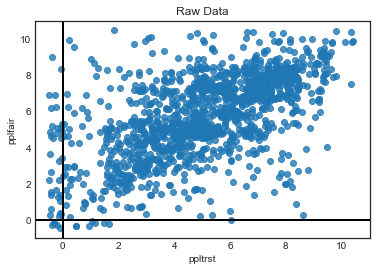

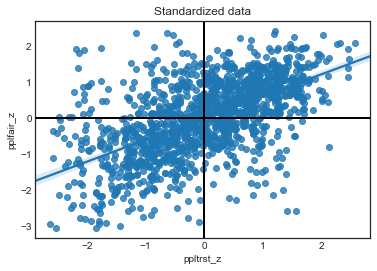

In [2]:
#make scatterplot matrix

#set default seaborn aesthetics
sns.set_style('white')

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

#take subset of data for PCA. This limits to swiss and czech data in 2012 and keeps some columns
df_pca = df.loc[
    ((df['cntry']=='CZ') | (df['cntry']=='CH')) & (df['year']==6),
    ['tvtot', 'ppltrst', 'pplfair', 'pplhlp']
].dropna()

t=sns.regplot(
    'ppltrst',
    'pplfair',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1,11), ylim=(-1,11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw Data')
plt.show()

#standardizing variables by subtracting mean and dividing by sd
#now both variables are on same scale
df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

t=sns.regplot(
    'ppltrst_z',
    'pplfair_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

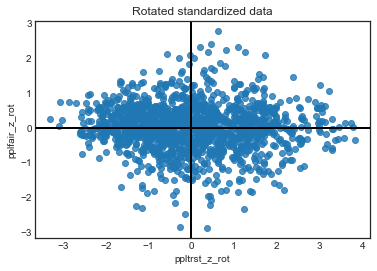

In [3]:
#rotate data so axes roughly match to vector using sin/cos
df_pca['ppltrst_z_rot'] = math.cos(40) * df_pca['ppltrst_z'] - math.sin(40) * df_pca['pplfair_z']
df_pca['pplfair_z_rot'] = math.sin(40) * df_pca['ppltrst_z'] + math.cos(40) * df_pca['pplfair_z']

t = sns.regplot(
    'ppltrst_z_rot',
    'pplfair_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

#due to rotation, hor vector is longer than vert vector; greater variance
#if we drop vert vector, loss of less than 50% information

In [4]:
#covariance matrix

In [5]:
#take subset of data for pca and drop missing values because pca can't hang
#could also impute but missingness is low so dropna() may not create bias

df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year']==6),
    ['tvtot','ppltrst','pplfair','pplhlp']
].dropna()

#normalize data so all variables have mean of 0 and standard deviation of 1
X = StandardScaler().fit_transform(df_pca)

#numpy covariance function assumes variables are represented by rows not cols
#so transpose X
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00071174 -0.24535312 -0.23531159 -0.17820482]
 [-0.24535312  1.00071174  0.60528939  0.49609931]
 [-0.23531159  0.60528939  1.00071174  0.53193085]
 [-0.17820482  0.49609931  0.53193085  1.00071174]]


In [6]:
#eigenvalues

In [9]:
#calculating eigenvalues and eigenvectors
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

#inspecting eigenvalues and eigenvectors
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')
print(
    'The percentage of total variance in the dataset explained by each component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov))

Eigenvector 1: 
[[-0.30084526]
 [ 0.55945823]
 [ 0.5681188 ]
 [ 0.52320135]]
Eigenvalue 1: 2.211256863199814
----------------------------------------
Eigenvector 2: 
[[ 0.94786152]
 [ 0.11600843]
 [ 0.15403897]
 [ 0.25371751]]
Eigenvalue 2: 0.8847413570711712
----------------------------------------
Eigenvector 3: 
[[ 0.10491426]
 [ 0.51597659]
 [ 0.28505945]
 [-0.80093836]]
Eigenvalue 3: 0.5151421389236853
----------------------------------------
Eigenvector 4: 
[[ 0.00660771]
 [ 0.63821367]
 [-0.75647481]
 [ 0.14277786]]
Eigenvalue 4: 0.39170661589427824
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [ 0.55242103  0.22102802  0.12869394  0.097857  ]


In [ ]:
#how many components

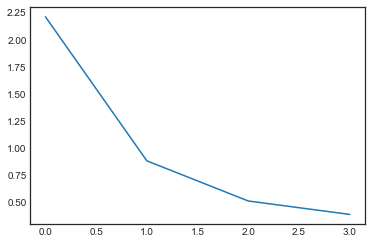

In [10]:
plt.plot(eig_val_cov)
plt.show()
#keep only first component due to rules

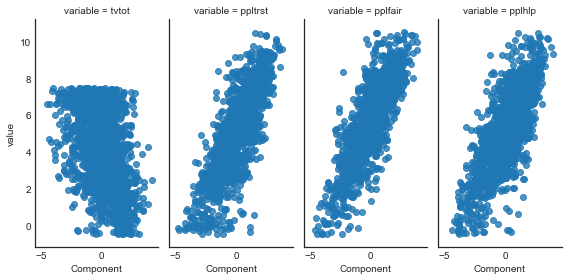

In [12]:
#create p - will use to transform Cx into Cy to get Y
#the dimensionally-reduced representation of X
P = eig_vec_cov[:, 0]

#transform X into Y
Y = P.T.dot(Xt)

#combine X and Y for plotting purposes
data_to_plot = df_pca[['tvtot', 'ppltrst', 'pplfair', 'pplhlp']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')


g = sns.FacetGrid(data_to_plot, col='variable', size=4, aspect=.5)
g=g.map(
    sns.regplot,
    'Component',
    'value',
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [ ]:
#PCA functions in matplotlib and scikit-learn that does it for us

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.55242103  0.22102802  0.12869394  0.097857  ]


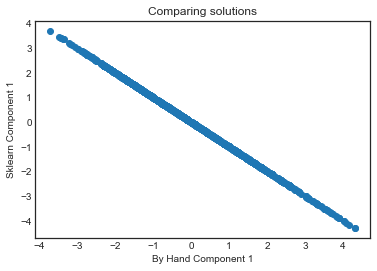

In [13]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

#Compare sklearn solution to ours
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By Hand Component 1')
plt.show()